EDA Report

Conclusions-

1) DATA CLEANING- The data is already clean, there are no null and duplicate values.
The data from 2 csv files (test_energy_data.csv and train_energy_data.csv) can be combined as we are not training and testing any model but only performing EDA

2) Average energy consumption of Industrial Buildings is maximum

3) From the graphs, we can observe that Energy Consumption varies linearly with the Square Footage

4) From the graphs, we can observe that Average Temperature does not have a significant effect on Energy Consumption

5) From the graphs, we can observe that the days of the week do not have any impact on the Energy Consumption


In [98]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [13]:
df1 = pd.read_csv('train_energy_data.csv')
df2 = pd.read_csv('test_energy_data.csv')

In [15]:
combined_df = pd.concat([df1, df2], ignore_index=True)
combined_df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


In [16]:
#Checking for null values
print(combined_df.isnull().sum())

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64


In [17]:
#checking for duplicate rows
print(combined_df.duplicated().sum())

0


In [19]:
combined_df.shape

(1100, 7)

In [20]:
combined_df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,25500.527273,48.268182,25.730000,22.559745,4168.191273
std,14236.955632,29.127624,14.116209,7.122357,924.278723
min,560.000000,1.000000,1.000000,10.050000,1683.950000
25%,13203.750000,22.000000,13.000000,16.365000,3510.460000
50%,25785.500000,47.000000,26.000000,22.810000,4189.690000
75%,37536.750000,73.000000,38.000000,28.760000,4859.510000
max,49997.000000,99.000000,49.000000,34.990000,6530.600000


In [21]:
combined_df['Building Type'].value_counts()

Building Type
Residential    387
Commercial     362
Industrial     351
Name: count, dtype: int64

In [22]:
residential = combined_df[combined_df['Building Type'] == 'Residential']
commercial = combined_df[combined_df['Building Type'] == 'Residential']
industrial = combined_df[combined_df['Building Type'] == 'Industrial']

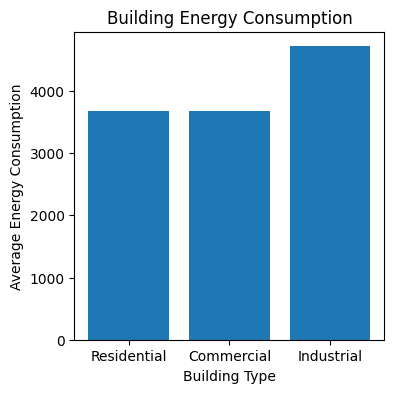

In [23]:
Building_type = list(combined_df['Building Type'].value_counts().keys())
means = [residential['Energy Consumption'].mean(), commercial['Energy Consumption'].mean(), industrial['Energy Consumption'].mean()]
plt.figure(figsize=(4,4))
plt.bar(Building_type, means)
plt.title("Building Energy Consumption")
plt.xlabel("Building Type")
plt.ylabel("Average Energy Consumption")
plt.show()

Relationship between Energy Consumption and Square Footage

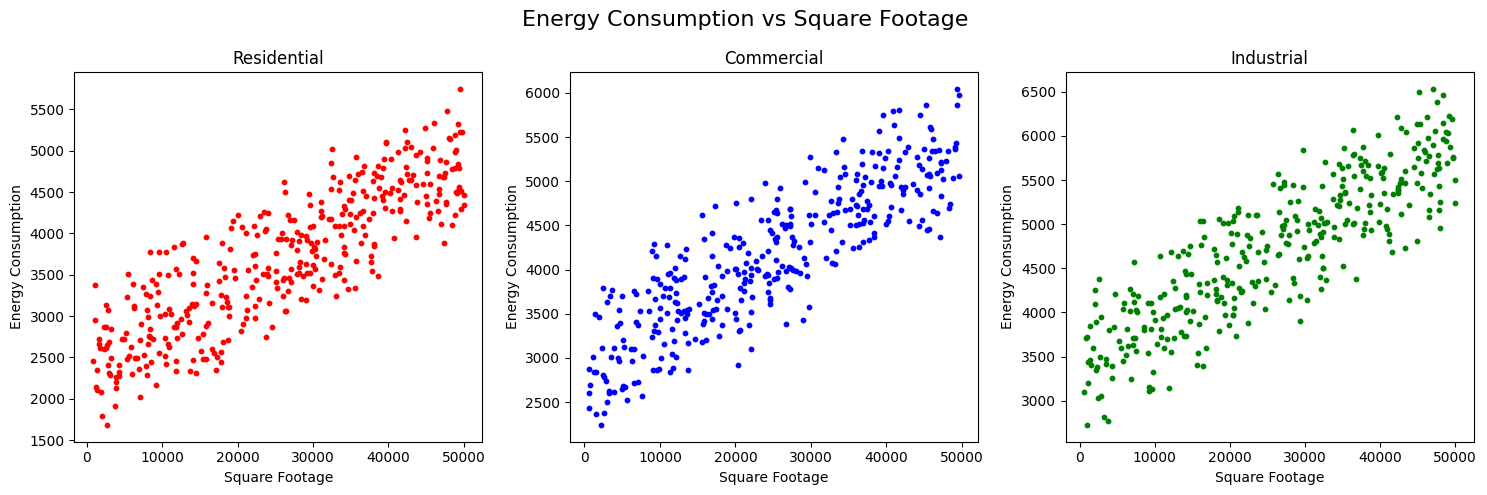

In [69]:
Building_types = list(combined_df['Building Type'].value_counts().keys())
colors = ['red', 'blue', 'green'] 

plt.figure(figsize=(15, 5))

for i, building_type in enumerate(Building_types):
    plt.subplot(1, len(Building_types), i+1)

    building_data = combined_df[combined_df['Building Type'] == building_type]
    
    # Assign a color from the list
    color = colors[i % len(colors)]
    
    # Plot the scatter plot for the current building type
    plt.scatter(building_data['Square Footage'], building_data['Energy Consumption'], color=color, label=building_type, s=10)
    
    # Set labels and title for each subplot
    plt.xlabel('Square Footage')
    plt.ylabel('Energy Consumption')
    plt.title(building_type)

# Adding main title
plt.suptitle('Energy Consumption vs Square Footage', fontsize=16)
plt.tight_layout()
plt.show()


Relationship between Energy Consumption and Average Temperature

C:\Users\kopal\AppData\Local\Temp\ipykernel_176332\664153126.py:24: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


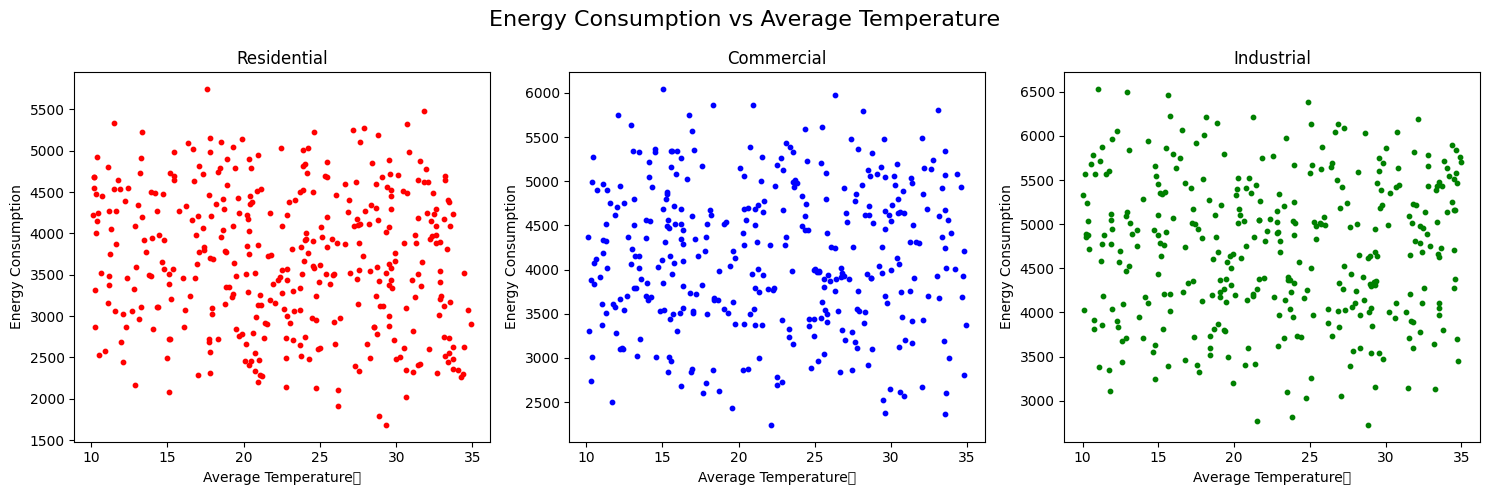

In [71]:
Building_types = list(combined_df['Building Type'].value_counts().keys())
colors = ['red', 'blue', 'green'] 

plt.figure(figsize=(15, 5))

for i, building_type in enumerate(Building_types):
    plt.subplot(1, len(Building_types), i+1)

    building_data = combined_df[combined_df['Building Type'] == building_type]
    
    # Assign a color from the list
    color = colors[i % len(colors)]
    
    # Plot the scatter plot for the current building type
    plt.scatter(building_data['Average Temperature'], building_data['Energy Consumption'], color=color, label=building_type, s=10)
    
    # Set labels and title for each subplot
    plt.xlabel('Average Temperature	')
    plt.ylabel('Energy Consumption')
    plt.title(building_type)

# Adding main title
plt.suptitle('Energy Consumption vs Average Temperature', fontsize=16)
plt.tight_layout()
plt.show()


Relationship between day of the week and Energy Consumed

In [91]:
# Filter weekdays and weekends
weekdays = combined_df[combined_df['Day of Week'] == 'Weekday']
weekends = combined_df[combined_df['Day of Week'] == 'Weekend']


In [92]:
# Filter by building type for weekdays
residential_weekdays = weekdays[weekdays['Building Type'] == 'Residential']
commercial_weekdays = weekdays[weekdays['Building Type'] == 'Commercial']
industrial_weekdays = weekdays[weekdays['Building Type'] == 'Industrial']

In [93]:
# Filter by building type for weekends
residential_weekends = weekends[weekends['Building Type'] == 'Residential']
commercial_weekends = weekends[weekends['Building Type'] == 'Commercial']
industrial_weekends = weekends[weekends['Building Type'] == 'Industrial']


In [94]:
# Extract building types
Building_type = list((combined_df['Building Type'].value_counts()).keys())

# Calculate means
means_weekdays = [
    residential_weekdays['Energy Consumption'].mean(),
    commercial_weekdays['Energy Consumption'].mean(),
    industrial_weekdays['Energy Consumption'].mean()
]
means_weekends = [
    residential_weekends['Energy Consumption'].mean(),
    commercial_weekends['Energy Consumption'].mean(),
    industrial_weekends['Energy Consumption'].mean()
]

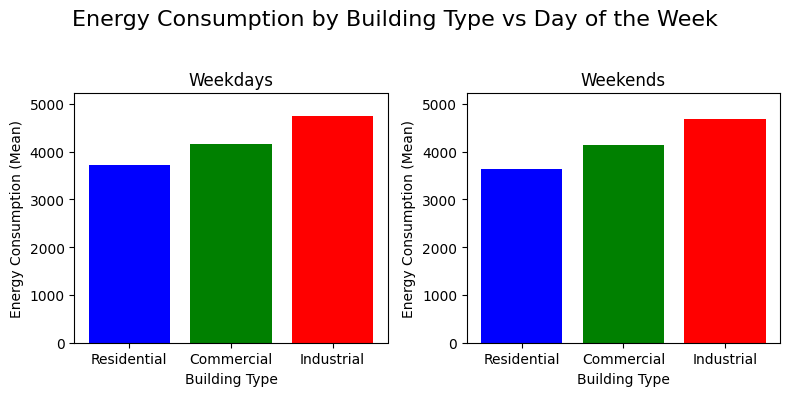

In [97]:
plt.figure(figsize=(8,4))
plt.suptitle("Energy Consumption by Building Type vs Day of the Week", fontsize=16)

# Weekdays plot
plt.subplot(1, 2, 1)
plt.bar(Building_type, means_weekdays, color=['blue', 'green', 'red'])
plt.title("Weekdays")
plt.xlabel("Building Type")
plt.ylabel("Energy Consumption (Mean)")
plt.ylim(0, max(max(means_weekdays), max(means_weekends)) * 1.1)  # Set consistent y-axis limits

# Weekends plot
plt.subplot(1, 2, 2)
plt.bar(Building_type, means_weekends, color=['blue', 'green', 'red'])
plt.title("Weekends")
plt.xlabel("Building Type")
plt.ylabel("Energy Consumption (Mean)")
plt.ylim(0, max(max(means_weekdays), max(means_weekends)) * 1.1)  # Set consistent y-axis limits

# Adjust layout
#rect: It defines a rectangle [left, bottom, right, top] in normalized figure coordinates (ranging from 0 to 1) where the subplots should fit
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust to fit suptitle
plt.show()
